In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.callbacks import Callback, ModelCheckpoint
from keras import optimizers
from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

C:\Users\done-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Carico il dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Train Shape --> x: {}\ty:{}\nTest Shape --> x: {}\ty:{}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Train Shape --> x: (60000, 28, 28)	y:(60000,)
Test Shape --> x: (10000, 28, 28)	y:(10000,)


Osserviamo il numero di classi

In [4]:
classi = set(y_train)
classi

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

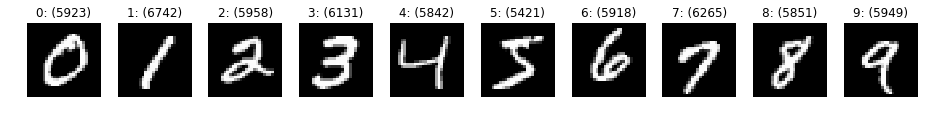

In [5]:
plt.figure(figsize=(16, 16))

i = 1
for cl in classi:
    image = x_train[y_train.tolist().index(cl)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(cl, y_train.tolist().count(cl)))
    i += 1
    _= plt.imshow(image, 'gray')

In [6]:
x_train.dtype

dtype('uint8')

Si effettuerà ora una conversione in float32 e si dividerà per 255, dato che ogni pixel ha un valore compreso tra 0 e 255, per avere valori compresi tra 0 e 1

In [7]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [8]:
y_train.shape

(60000,)

Si ricodificano le variabili di classificazione come one hot

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train.shape

(60000, 10)

### Modello 1

In [11]:
input_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), strides = (2,2), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(10, kernel_size=(3, 3), strides = (1,1), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 10)          2890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
__________

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size = 128, epochs= 30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 139us/step - loss: 1.5330 - acc: 0.4366 - val_loss: 0.6566 - val_acc: 0.8470
Epoch 2/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.9414 - acc: 0.6612 - val_loss: 0.3683 - val_acc: 0.9148
Epoch 3/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.7905 - acc: 0.7086 - val_loss: 0.2763 - val_acc: 0.9320
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.7209 - acc: 0.7362 - val_loss: 0.2285 - val_acc: 0.9390
Epoch 5/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.6697 - acc: 0.7565 - val_loss: 0.2092 - val_acc: 0.9488
Epoch 6/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.6299 - acc: 0.7709 - val_loss: 0.1767 - val_acc: 0.9555
Epoch 7/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.5683 - acc: 0.7907 - val_loss: 0.1632 - val

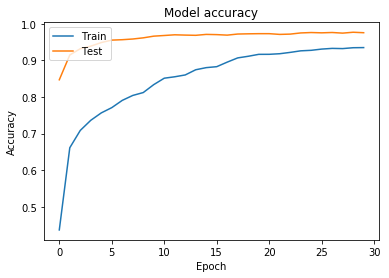

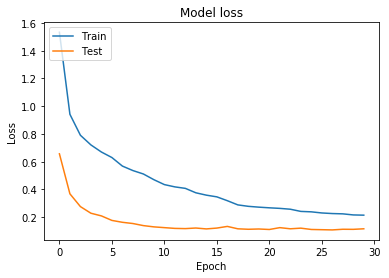

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Modello 2

In [17]:
model2 = Sequential()

model2.add(layers.Conv2D(6, kernel_size=(3, 3), strides = (2,2), activation='relu', input_shape=input_shape))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.Flatten())
model2.add(Dense(40, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [18]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 6)         60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 216)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                8680      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                410       
Total params: 9,150
Trainable params: 9,150
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history2 = model2.fit(x_train, y_train, batch_size = 128, epochs= 30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/step - loss: 1.0314 - acc: 0.6623 - val_loss: 0.3955 - val_acc: 0.8838
Epoch 2/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.5814 - acc: 0.8150 - val_loss: 0.2999 - val_acc: 0.9080
Epoch 3/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.4948 - acc: 0.8426 - val_loss: 0.2594 - val_acc: 0.9217
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.4494 - acc: 0.8582 - val_loss: 0.2277 - val_acc: 0.9308
Epoch 5/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.4179 - acc: 0.8683 - val_loss: 0.2098 - val_acc: 0.9344
Epoch 6/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.3920 - acc: 0.8778 - val_loss: 0.1949 - val_acc: 0.9417
Epoch 7/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.3718 - acc: 0.8843 - val_loss: 0.1807 - val_acc

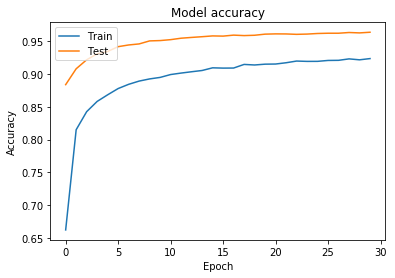

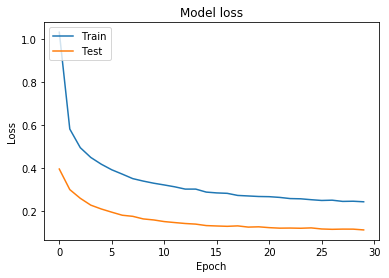

In [21]:
# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confrontiamo loss e accuracy dei due modelli sul test

In [22]:
import seaborn as sns

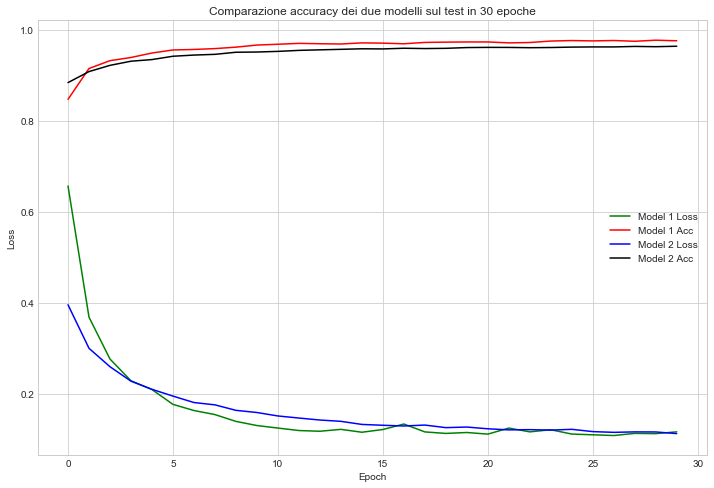

In [23]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize= (12,8))
plt.plot(history.history['val_loss'], color = 'green')
plt.plot(history.history['val_acc'], color = 'red')
plt.plot(history2.history['val_loss'], color = 'blue')
plt.plot(history2.history['val_acc'], color = 'black')
plt.title('Comparazione accuracy dei due modelli sul test in 30 epoche')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1 Loss', 'Model 1 Acc', 'Model 2 Loss', 'Model 2 Acc'], loc='center right')
plt.show()

Il primo modello elaborato è quello che da migliori risultati in termini di loss e di accuracy sul test

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11631735169892199
Test accuracy: 0.9757


In [28]:
pred = model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report

In [34]:
#Riporto la predizione da one-hot a vettore monodimensionale
np.argmax(pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
prediz = np.argmax(pred, axis=1)

In [37]:
prediz

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
y_test = np.argmax(y_test, axis=1)

In [42]:
print(classification_report(y_test, prediz))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.98      0.98      1032
          3       0.99      0.97      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.95      0.98      0.96       892
          6       0.97      0.98      0.98       958
          7       0.97      0.96      0.96      1028
          8       0.98      0.97      0.97       974
          9       0.98      0.95      0.96      1009

avg / total       0.98      0.98      0.98     10000



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[ 967    0    1    0    0    2    7    2    1    0]
 [   2 1121    4    1    0    2    1    2    1    1]
 [   3    3 1012    0    1    1    2    6    4    0]
 [   0    0    2  983    0   14    0    8    2    1]
 [   1    0    1    0  965    1    7    1    1    5]
 [   3    0    0    6    0  876    4    1    1    1]
 [   5    4    0    0    3    3  943    0    0    0]
 [   1    7   18    1    0    4    0  991    1    5]
 [   3    0    2    4    1    7    4    5  940    8]
 [   2    3    0    2   12   15    1   10    5  959]]


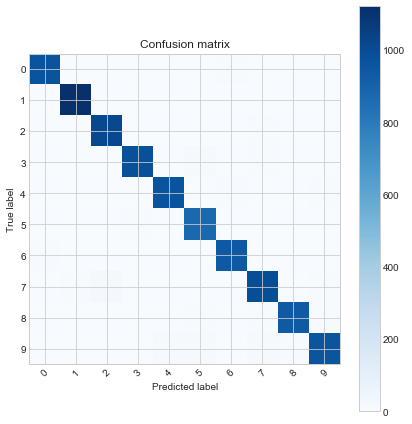

In [59]:
cmp = confusion_matrix(y_test, prediz, labels=[0,1,2,3,4,5,6,7,8,9], sample_weight=None)
print(cmp)

class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cmp, classes=class_names, title='Confusion matrix')